In [124]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt

In [125]:
house_prices = pd.read_csv("Bengaluru_House_Data.csv")
house_prices.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


CLEANING DATA

<Axes: >

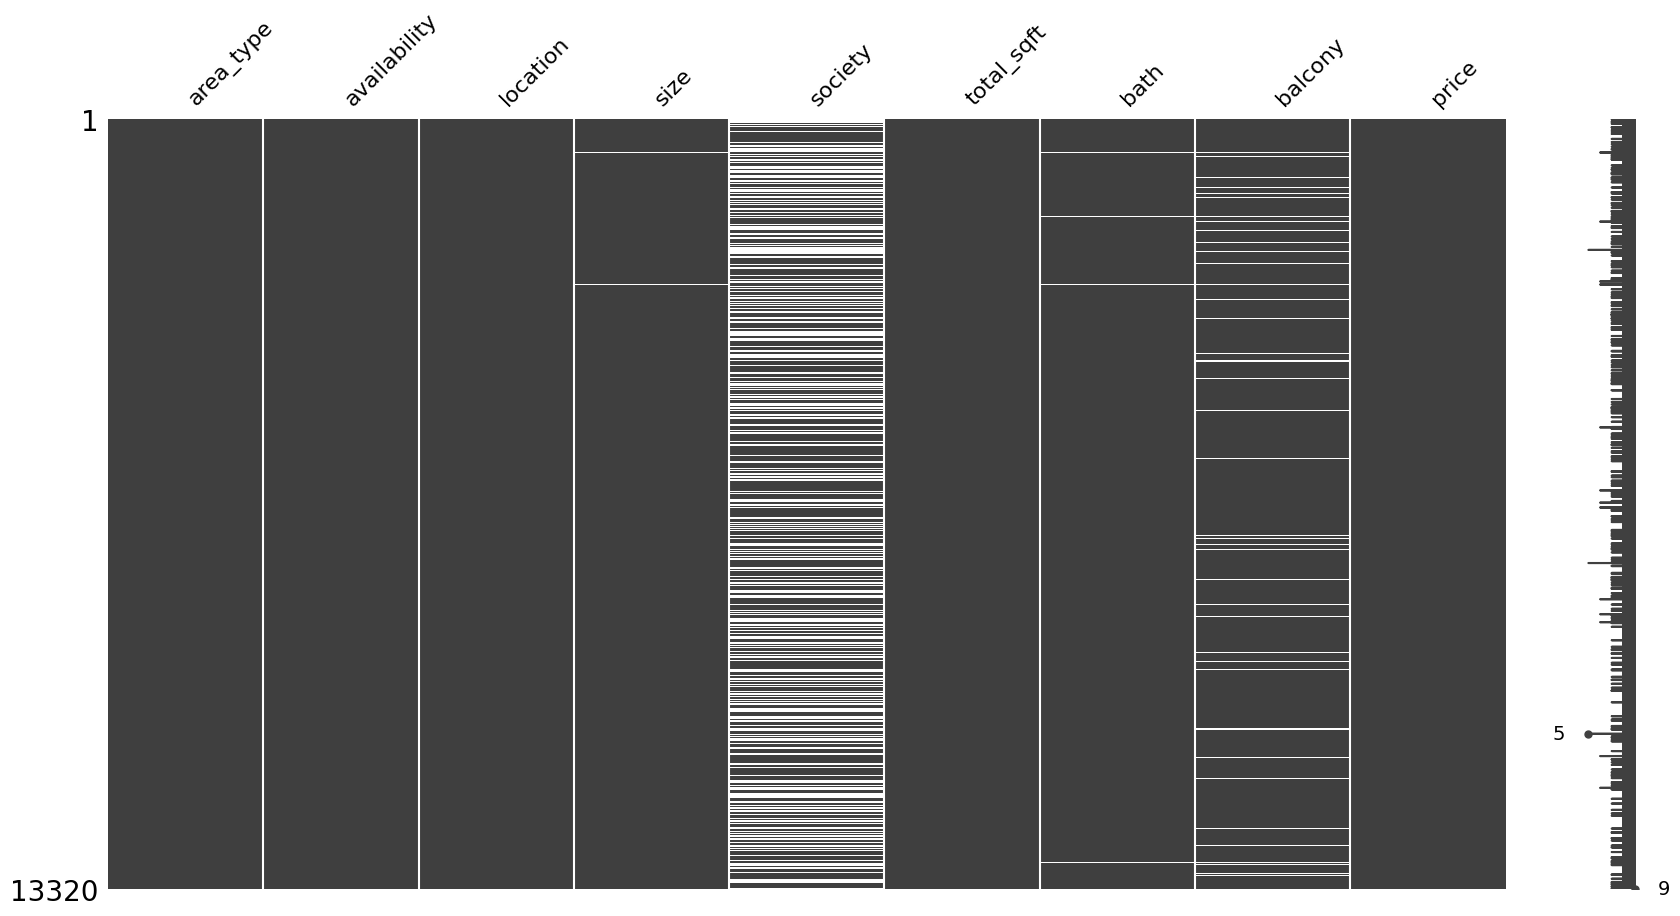

In [126]:
import missingno
missingno.matrix(house_prices,figsize=(20,10))

In [127]:
house_prices.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [128]:
# How much total of each type of the area?

house_prices.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [129]:
house_prices = house_prices.drop(['area_type','society','availability','balcony'],axis=1)
house_prices.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [130]:
house_prices.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [131]:
house_prices.bath = house_prices.bath.fillna(house_prices.bath.median())
house_prices = house_prices.dropna()
house_prices.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [132]:
house_prices['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [133]:
# Cleaning size column
house_prices['bhk'] = house_prices['size'].apply(lambda x: int(x.split(" ")[0]))
house_prices.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [134]:
# Find and remove outliers

print(house_prices['bhk'].unique())
house_prices[house_prices['bhk'] > 20]
# It seems like an error because houses have 27 or 43 bhk, but the total_sqft is pretty small

[ 2  4  3  6  1  8  7  5 11  9 27 10 19 16 43 14 12 13 18]


,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [135]:
house_prices['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [136]:
def convert_sqft_to_num(x) : 
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    
house_prices['total_sqft'] = house_prices['total_sqft'].apply(convert_sqft_to_num)
house_prices.head(15)
    

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


FEATURE ENGINEERING

In [137]:
# Create feature price_per_sqft

house_prices['price_per_sqft'] = house_prices['price']*100000/house_prices['total_sqft']
house_prices.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [138]:
len(house_prices['location'].unique())

1304

In [139]:
# remove location which has less than 10 rows

house_prices['location'] = house_prices['location'].apply(lambda x : x.strip())

locatiion_stats = house_prices.groupby('location')['location'].agg('count').sort_values(ascending=False)
locatiion_stats

location
Whitefield               540
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [140]:
locatiion_stats_less_than_10 = locatiion_stats[locatiion_stats<=10]
locatiion_stats_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [141]:
house_prices['location'] = house_prices['location'].apply(lambda x: 'other' if x in locatiion_stats_less_than_10 else x)
len(house_prices['location'].unique())

242

OUTLIER REMOVAL

In [142]:
house_prices = house_prices[~(house_prices['total_sqft']/house_prices['bhk']<300)]
house_prices.shape

(12559, 7)

In [143]:
house_prices['price_per_sqft'].describe()

count     12513.000000
mean       6307.441644
std        4160.931610
min         267.829813
25%        4210.526316
50%        5295.007564
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [144]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('location'):
        mean = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft']>(mean-std)) & (subdf['price_per_sqft']<=(mean+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=False)
    return df_out

house_prices = remove_pps_outliers(house_prices)
house_prices.shape

(10286, 7)

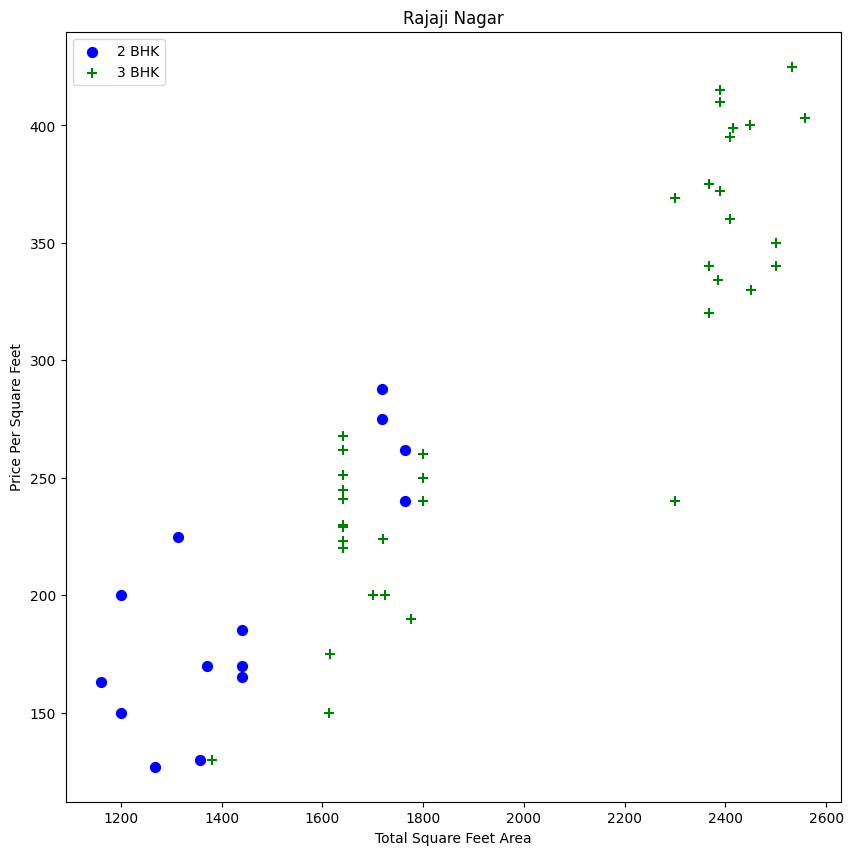

In [145]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (10,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price'],color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'],marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel('Total Square Feet Area')
    plt.ylabel('Price Per Square Feet')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(house_prices, 'Rajaji Nagar')
    

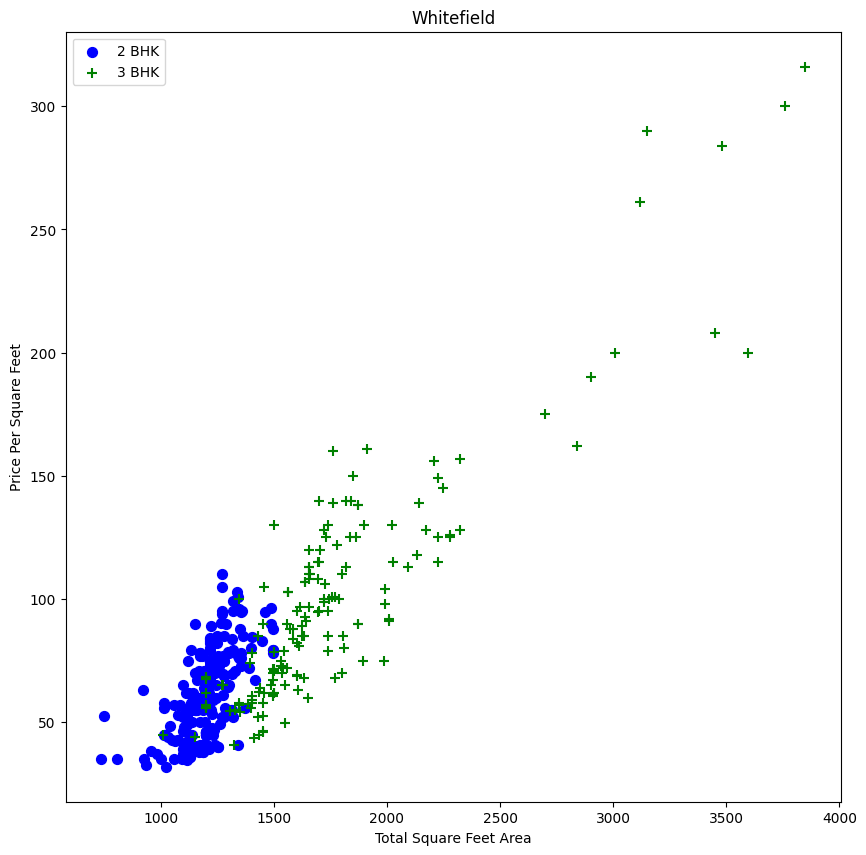

In [146]:
plot_scatter_chart(house_prices, 'Whitefield')

In [147]:
def remove_bhk_outliers(df):
    exclude_indicies = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df['price_per_sqft']),
                'std' : np.std(bhk_df['price_per_sqft']),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indicies = np.append(exclude_indicies,bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
    return df.drop(exclude_indicies,axis='index')
    
house_prices = remove_bhk_outliers(house_prices)
house_prices.shape

(7353, 7)

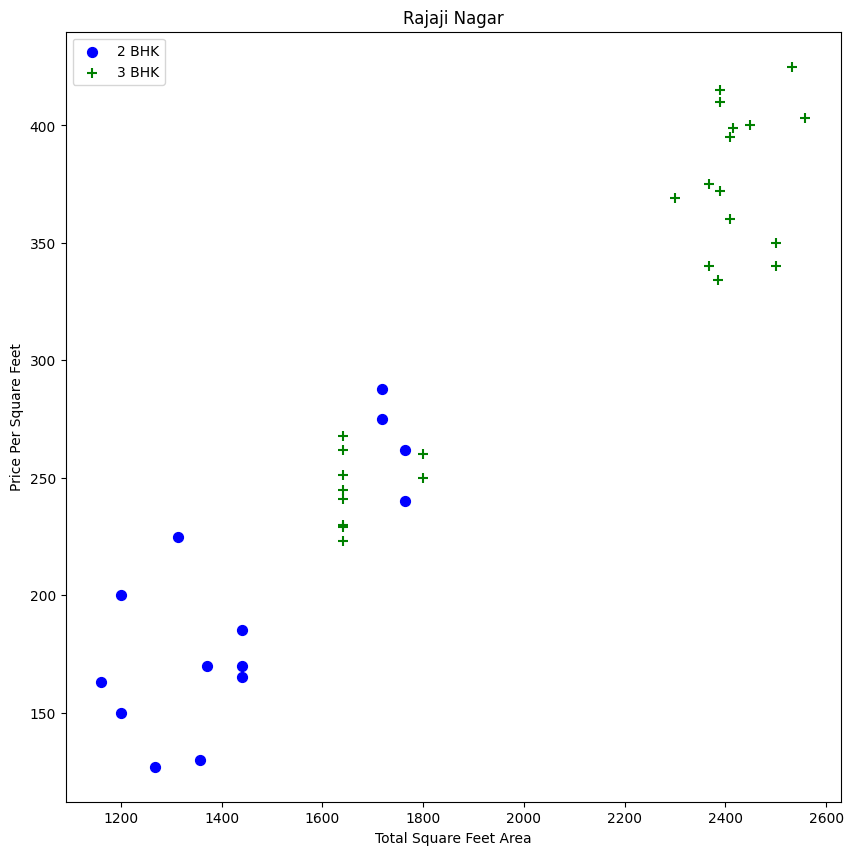

In [148]:
plot_scatter_chart(house_prices, 'Rajaji Nagar')

Text(0, 0.5, 'Count')

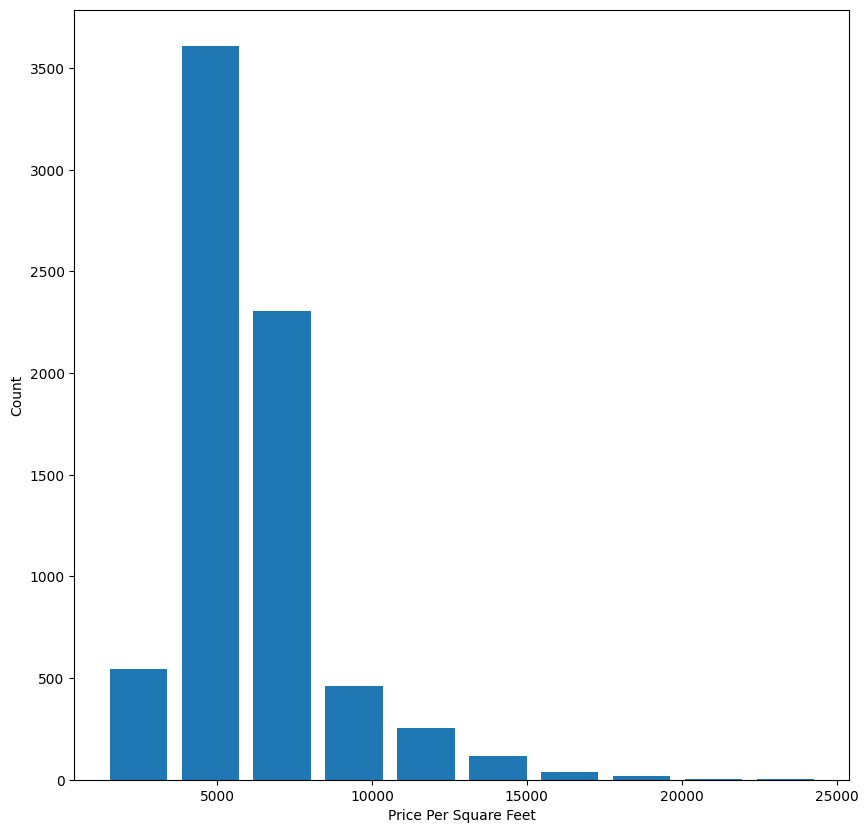

In [149]:
plt.figure(figsize=(10,10))
plt.hist(house_prices['price_per_sqft'],rwidth=0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [150]:
house_prices.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'Count')

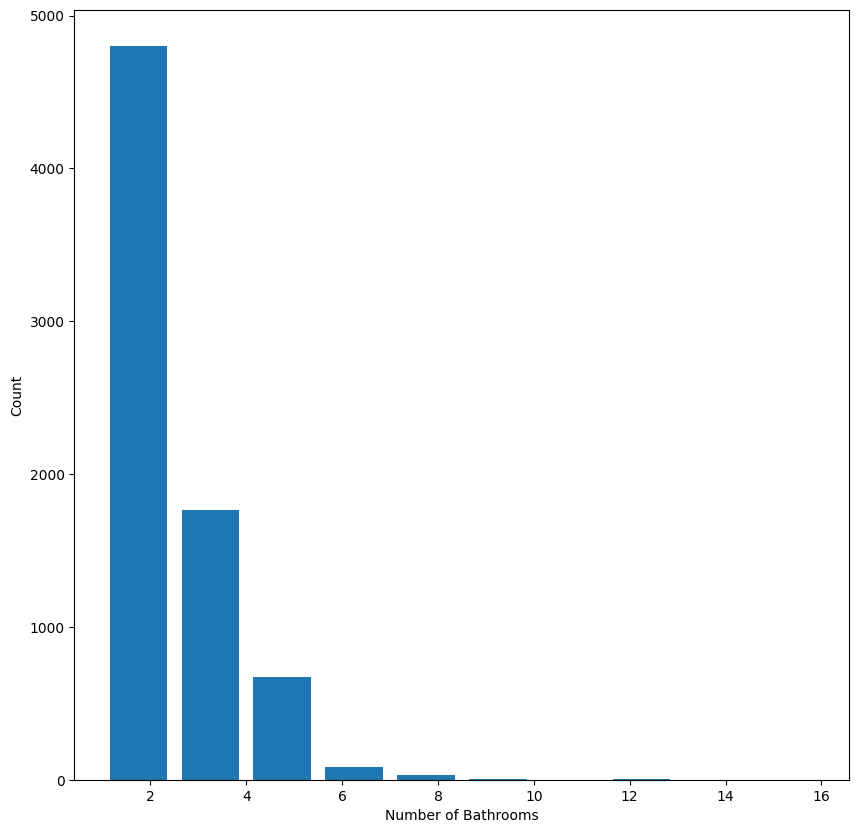

In [151]:
plt.hist(house_prices.bath,rwidth=0.8)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')

In [152]:
house_prices = house_prices[house_prices['bath']<house_prices['bath']+2]
house_prices.shape

(7353, 7)

In [153]:
house_prices = house_prices.drop(['size', 'price_per_sqft'],axis=1)
house_prices.head()

,location,total_sqft,bath,price,bhk
210,1st Block Jayanagar,2850.0,4.0,428.0,4
848,1st Block Jayanagar,1630.0,3.0,194.0,3
2152,1st Block Jayanagar,1875.0,2.0,235.0,3
7138,1st Block Jayanagar,1200.0,2.0,130.0,3
7358,1st Block Jayanagar,1235.0,2.0,148.0,2


MODEL BUILDING

In [154]:
# use one hot encoding

dummies = pd.get_dummies(house_prices.location)
house_prices = pd.concat([house_prices,dummies.drop('other',axis=1)],axis=1)
house_prices.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7138,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7358,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
house_prices = house_prices.drop('location',axis=1)
house_prices.head(3)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
210,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
848,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2152,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
# create x and y for model
from sklearn.model_selection import train_test_split

x = house_prices.drop('price',axis=1)
y = house_prices['price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [157]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),x,y,cv=cv)

# we can notice that linearregres model has about 86% acc
# so we can try other models and figure out what kind of model will give us the best result

array([0.8756932 , 0.88410266, 0.82044584, 0.80945033, 0.84970786])

In [158]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

model_params = {
    'LinearReg' : {
        'model' : LinearRegression(),
        'params' : {
            'positive' : [True,False]
        }
    },
    'Random_Forest' : {
        'model' : RandomForestRegressor(),
        'params' : {
            'n_estimators' : [1,5,10,20],
            'max_depth' : [5,10,12],
            'max_samples' : [5,20,50,100]
        }
    },
    'Lasso' : {
        'model' : Lasso(),
        'params' : {
            'alpha' : [1,2],
            'selection' : ['random','cyclic']
        }
    },
     'DesTree' : {
        'model' : DecisionTreeRegressor(),
        'params' : {
            'criterion' : ['squared_error','friedman_mse'],
            'splitter' : ['best','random']
        }
    },
    
}

In [159]:
scores = []
cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

for model_name,mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'],cv=cv,return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model' : model_name,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    
df = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df.sort_values(by='best_score',ascending=False)
# According to the dataframe below we will definetly use LinearRegression model for prediction in our project

,model,best_score,best_params
0,LinearReg,0.847880,{'positive': False}
2,Lasso,0.715424,"{'alpha': 1, 'selection': 'random'}"
3,DesTree,0.679949,"{'criterion': 'squared_error', 'splitter': 'ra..."
1,Random_Forest,0.648902,"{'max_depth': 5, 'max_samples': 100, 'n_estima..."


In [165]:
lin_model = LinearRegression(positive=False)
lin_model.fit(x_train.values,y_train.values)
lin_model.score(x_test.values,y_test)

0.8577951737815421

In [166]:
# Make some prediction

def predict_price(x,location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    
    x = np.zeros(len(x.columns))
    x[0] = sqft
    x[1] =  bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
        
    return lin_model.predict([x])[0]

predict_price(x,'Indira Nagar', 1000, 2, 2)

175.82100435331455

CREATE PICKLE FILE

In [167]:
import pickle
with open('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lin_model,f)

In [169]:
import json 
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))